In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
training_data = datasets.MNIST(root="data",train=True,download=True,transform=trans)




  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
#tdata = datasets.MNIST(root="data",train=False,download=True,transform=trans)
#tdata = DataLoader(tdata, batch_size=128, shuffle=False)

In [7]:

data = DataLoader(training_data, batch_size=500, shuffle=True)
#data, labels = next(iter(train_dataloader))




In [13]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1=nn.Linear(784,196)
    self.fc2=nn.Linear(196,98)
    self.fc3=nn.Linear(98,10)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return F.log_softmax(x)




In [18]:
net=Net()

In [20]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001,momentum=0.9)
loss_fn=nn.CrossEntropyLoss()

In [9]:
epoch=10

In [ ]:
s=0
for k, (images, labels) in enumerate(data):   #Enumerates the images, labels in the batch k for all batches
  images = images.view(images.shape[0], -1)
  print(len(images[0]))
  s=s+1
  print(s)

In [21]:
l=[]
accuracy=[]
e=[]

for j in range(epoch):
  for i, (img,lbl) in enumerate(data):
    img=img.view(img.shape[0],-1)
    out=net(img)
    loss=loss_fn(out,lbl)
    l.append(float(loss))
    total=lbl.size(0)
    _, predicted = torch.max(out.data , 1)
    correct = (predicted == lbl).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if i%10 == 0:
      print(loss)
      print(acc)
    #predicted=torch.max(out.data,1)
    loss = loss_fn(out,lbl)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


tensor(2.3149, grad_fn=<NllLossBackward0>)
9.2
tensor(2.2985, grad_fn=<NllLossBackward0>)
11.2
tensor(2.2776, grad_fn=<NllLossBackward0>)
17.0
tensor(2.2522, grad_fn=<NllLossBackward0>)
24.4
tensor(2.2153, grad_fn=<NllLossBackward0>)
36.4
tensor(2.1919, grad_fn=<NllLossBackward0>)
44.6
tensor(2.1744, grad_fn=<NllLossBackward0>)
45.0
tensor(2.1281, grad_fn=<NllLossBackward0>)
54.8
tensor(2.0877, grad_fn=<NllLossBackward0>)
56.2
tensor(2.0654, grad_fn=<NllLossBackward0>)
57.8
tensor(2.0289, grad_fn=<NllLossBackward0>)
57.0
tensor(1.9296, grad_fn=<NllLossBackward0>)
66.6
tensor(1.8819, grad_fn=<NllLossBackward0>)
64.6
tensor(1.8163, grad_fn=<NllLossBackward0>)
66.2
tensor(1.7445, grad_fn=<NllLossBackward0>)
66.8
tensor(1.6910, grad_fn=<NllLossBackward0>)
65.8
tensor(1.6191, grad_fn=<NllLossBackward0>)
64.2
tensor(1.5331, grad_fn=<NllLossBackward0>)
68.0
tensor(1.4143, grad_fn=<NllLossBackward0>)
72.6
tensor(1.3761, grad_fn=<NllLossBackward0>)
69.8
tensor(1.2740, grad_fn=<NllLossBackward0>

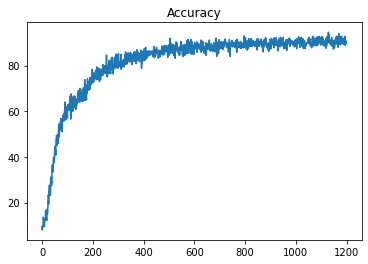

In [32]:

import matplotlib.pyplot as plt

plt.plot(accuracy)
plt.title('Accuracy')
plt.show()

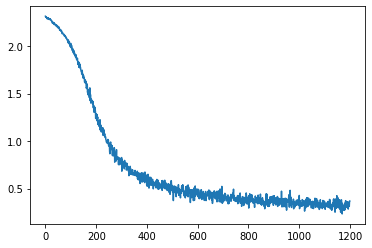

In [26]:
plt.plot(l)
plt.title
plt.show()